In [1]:
from pathlib import Path

In [2]:
all_cube_files = list(Path('../experiments/').glob('**/*.hdf5'))

In [3]:
all_cube_files

[PosixPath('../experiments/2019-02-19_11_30/generated/gen_checkpoint_net_g_80.pth_14300631_imgf_15.hdf5'),
 PosixPath('../experiments/2019-02-19_11_30/generated/gen_checkpoint_net_g_80.pth_14300631_imgf_20.hdf5'),
 PosixPath('../experiments/2019-02-19_11_30/generated/gen_checkpoint_net_g_80.pth_568_imgf_27.hdf5'),
 PosixPath('../experiments/2019-02-19_11_30/generated/gen_checkpoint_net_g_80.pth_2348_imgf_27.hdf5'),
 PosixPath('../experiments/2019-02-19_11_30/generated/gen_checkpoint_net_g_80.pth_9_imgf_27.hdf5'),
 PosixPath('../experiments/2019-02-19_11_30/generated/gen_checkpoint_net_g_80.pth_435001_imgf_27.hdf5'),
 PosixPath('../experiments/2019-02-19_11_30/generated/gen_checkpoint_net_g_80.pth_27_imgf_27.hdf5'),
 PosixPath('../experiments/2019-02-19_11_30/generated/gen_checkpoint_net_g_80.pth_23210_imgf_27.hdf5'),
 PosixPath('../experiments/2019-02-19_11_30/generated/gen_checkpoint_net_g_80.pth_751_imgf_27.hdf5'),
 PosixPath('../experiments/2019-02-19_11_30/generated/gen_checkpoint_

In [2]:
from minkowski import compute_minkowski
import h5py
import pandas as pd
from tqdm import tqdm
import tifffile

In [5]:
rows_list = []
stat_keys = ['experiment', 'size', 'seed', 'V', 'S', 'B', 'Xi']
original_berea = tifffile.imread('../experiments/berea_original.tif')
berea_stats = ['original_berea', 400, 42] + list(compute_minkowski(original_berea // 255))
rows_list.append({key: value for key, value in zip(stat_keys, berea_stats)})

In [6]:
for path in tqdm(all_cube_files, desc='Cube'):

    with h5py.File(path, 'r') as file:
        cube = file['data'][()]

    cube_stats = [path.parts[2], cube.shape[0], int(path.stem.split('_')[-3])] + list(compute_minkowski(cube//255))
    rows_list.append({key: value for key, value in zip(stat_keys, cube_stats)})

Cube: 100%|██████████| 50/50 [01:23<00:00,  1.18s/it]


In [7]:
df_stats = pd.DataFrame(rows_list)

In [8]:
df_stats

,B,S,V,Xi,experiment,seed,size
0,0.001519,0.118962,0.190939,-5.550000e-05,original_berea,42,400
1,0.001533,0.152494,0.274695,-9.233479e-05,2019-02-19_11_30,14300631,232
2,0.001618,0.155856,0.273383,-9.809389e-05,2019-02-19_11_30,14300631,296
3,0.001631,0.153444,0.264169,-9.921745e-05,2019-02-19_11_30,568,384
4,0.001648,0.153558,0.263815,-9.934107e-05,2019-02-19_11_30,2348,384
5,0.001663,0.153388,0.263292,-9.706285e-05,2019-02-19_11_30,9,384
6,0.001662,0.153959,0.263971,-9.889956e-05,2019-02-19_11_30,435001,384
7,0.001660,0.152942,0.263440,-9.473165e-05,2019-02-19_11_30,27,384
8,0.001651,0.153963,0.264219,-9.997686e-05,2019-02-19_11_30,23210,384
9,0.001662,0.154442,0.264354,-1.006303e-04,2019-02-19_11_30,751,384


In [9]:
df_stats.to_csv('cube_stats.csv', header=True, index=False)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## Experiment 2019-02-19 11:30

### Зависимость V от размера куба (fix seed = 14300631)

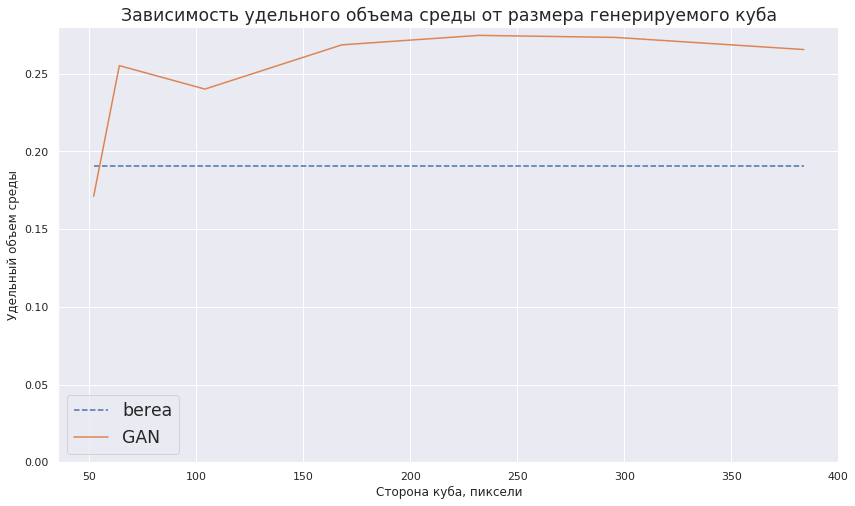

In [48]:
berea = df_stats.loc[0]['V']
df = df_stats[(df_stats['experiment'] == '2019-02-19_11_30') & (df_stats['seed'] == 14300631)].sort_values('size')
xs = df['size'].values

fig = plt.figure(figsize=(14, 8))
plt.plot(xs, [berea]*len(xs), label='berea', linestyle='dashed')
plt.plot(xs, df['V'], label='GAN')
plt.legend(fontsize='xx-large')
plt.title("Зависимость удельного объема среды от размера генерируемого куба", fontsize='xx-large')
plt.xlabel("Сторона куба, пиксели")
plt.ylabel("Удельный объем среды")
plt.ylim(0)
plt.show()

### Разброс V в зависимости от сида

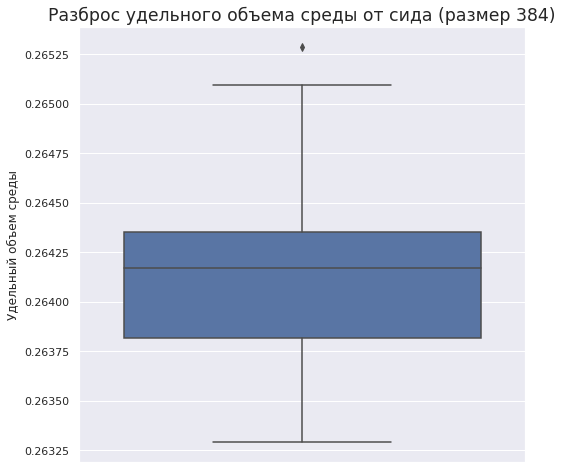

In [49]:
berea = df_stats.loc[0]['V']
df = df_stats[(df_stats['experiment'] == '2019-02-19_11_30') & (df_stats['seed'] != 14300631)].sort_values('size')

fig = plt.figure(figsize=(8, 8))
sns.boxplot(df['V'], orient='v')
plt.title("Разброс удельного объема среды от сида (размер 384)", fontsize='xx-large')
plt.ylabel('Удельный объем среды')
plt.show()

### Зависимость S от размера куба (fix seed = 14300631)

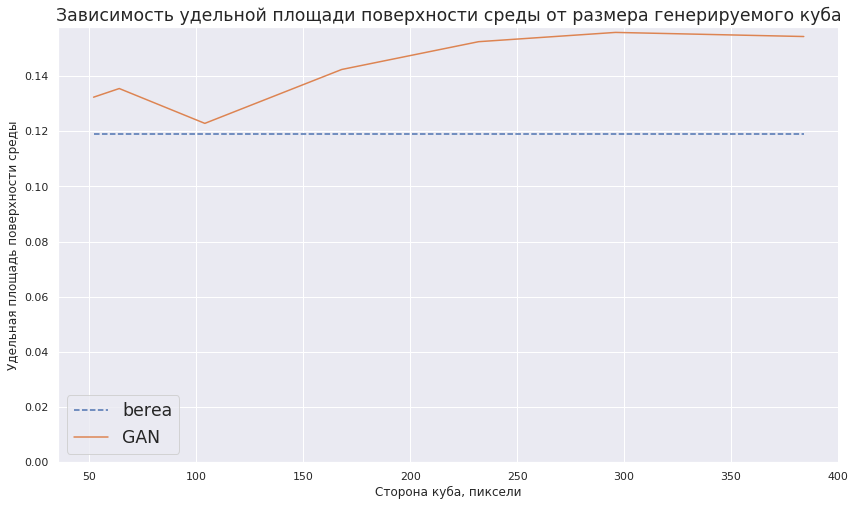

In [52]:
berea = df_stats.loc[0]['S']
df = df_stats[(df_stats['experiment'] == '2019-02-19_11_30') & (df_stats['seed'] == 14300631)].sort_values('size')
xs = df['size'].values

fig = plt.figure(figsize=(14, 8))
plt.plot(xs, [berea]*len(xs), label='berea', linestyle='dashed')
plt.plot(xs, df['S'], label='GAN')
plt.legend(fontsize='xx-large')
plt.title("Зависимость удельной площади поверхности среды от размера генерируемого куба", fontsize='xx-large')
plt.xlabel("Сторона куба, пиксели")
plt.ylabel("Удельная площадь поверхности среды")
plt.ylim(0)
plt.show()

### Разброс S в зависимости от сида

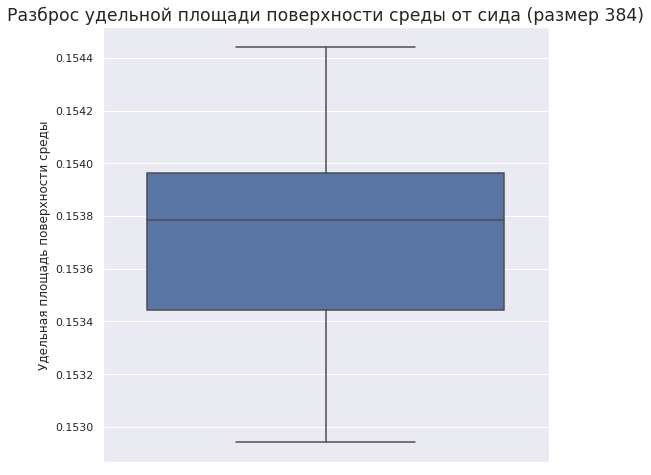

In [53]:
berea = df_stats.loc[0]['S']
df = df_stats[(df_stats['experiment'] == '2019-02-19_11_30') & (df_stats['seed'] != 14300631)].sort_values('size')

fig = plt.figure(figsize=(8, 8))
sns.boxplot(df['S'], orient='v')
plt.title("Разброс удельной площади поверхности среды от сида (размер 384)", fontsize='xx-large')
plt.ylabel('Удельная площадь поверхности среды')
plt.show()

### Зависимость B от размера куба (fix seed = 14300631)

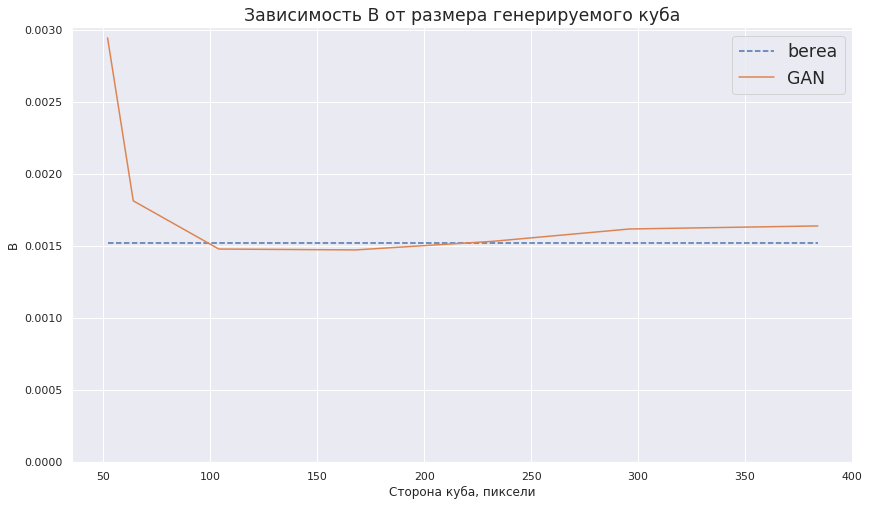

In [54]:
berea = df_stats.loc[0]['B']
df = df_stats[(df_stats['experiment'] == '2019-02-19_11_30') & (df_stats['seed'] == 14300631)].sort_values('size')
xs = df['size'].values

fig = plt.figure(figsize=(14, 8))
plt.plot(xs, [berea]*len(xs), label='berea', linestyle='dashed')
plt.plot(xs, df['B'], label='GAN')
plt.legend(fontsize='xx-large')
plt.title("Зависимость B от размера генерируемого куба", fontsize='xx-large')
plt.xlabel("Сторона куба, пиксели")
plt.ylabel("B")
plt.ylim(0)
plt.show()

### Разброс B в зависимости от сида

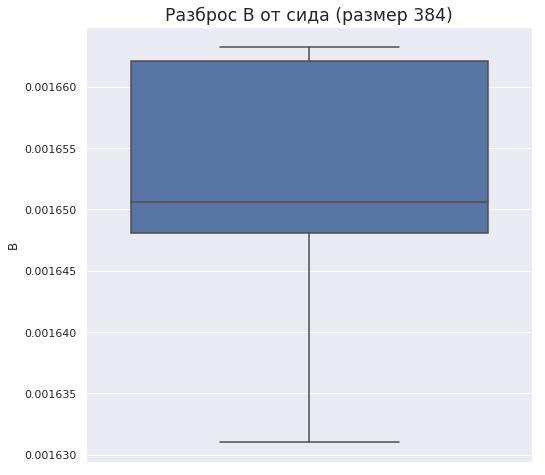

In [55]:
berea = df_stats.loc[0]['B']
df = df_stats[(df_stats['experiment'] == '2019-02-19_11_30') & (df_stats['seed'] != 14300631)].sort_values('size')

fig = plt.figure(figsize=(8, 8))
sns.boxplot(df['B'], orient='v')
plt.title("Разброс B от сида (размер 384)", fontsize='xx-large')
plt.ylabel('B')
plt.show()

### Зависимость Xi от размера куба (fix seed = 14300631)

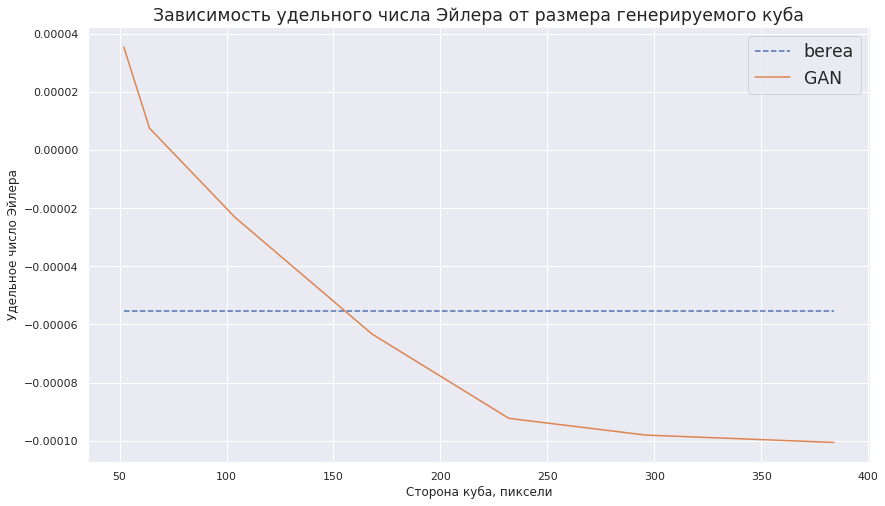

In [50]:
berea = df_stats.loc[0]['Xi']
df = df_stats[(df_stats['experiment'] == '2019-02-19_11_30') & (df_stats['seed'] == 14300631)].sort_values('size')
xs = df['size'].values

fig = plt.figure(figsize=(14, 8))
plt.plot(xs, [berea]*len(xs), label='berea', linestyle='dashed')
plt.plot(xs, df['Xi'], label='GAN')
plt.legend(fontsize='xx-large')
plt.title("Зависимость удельного числа Эйлера от размера генерируемого куба", fontsize='xx-large')
plt.xlabel("Сторона куба, пиксели")
plt.ylabel("Удельное число Эйлера")
plt.show()

### Разброс Xi в зависимости от сида

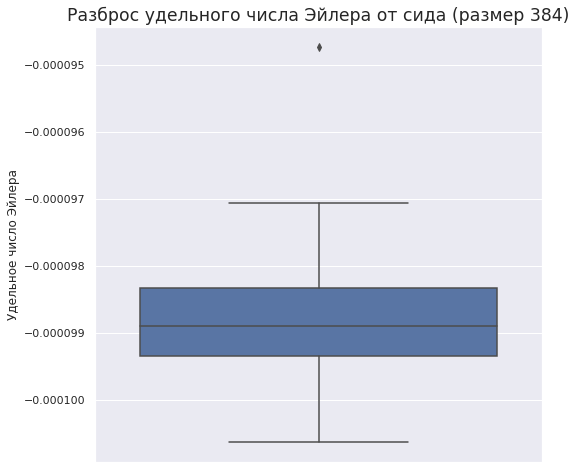

In [51]:
berea = df_stats.loc[0]['Xi']
df = df_stats[(df_stats['experiment'] == '2019-02-19_11_30') & (df_stats['seed'] != 14300631)].sort_values('size')

fig = plt.figure(figsize=(8, 8))
sns.boxplot(df['Xi'], orient='v')
plt.title("Разброс удельного числа Эйлера от сида (размер 384)", fontsize='xx-large')
plt.ylabel('Удельное число Эйлера')
plt.show()

## Experiment 2019-02-24 22:44

### Зависимость V от размера куба (fix seed = 14300631)

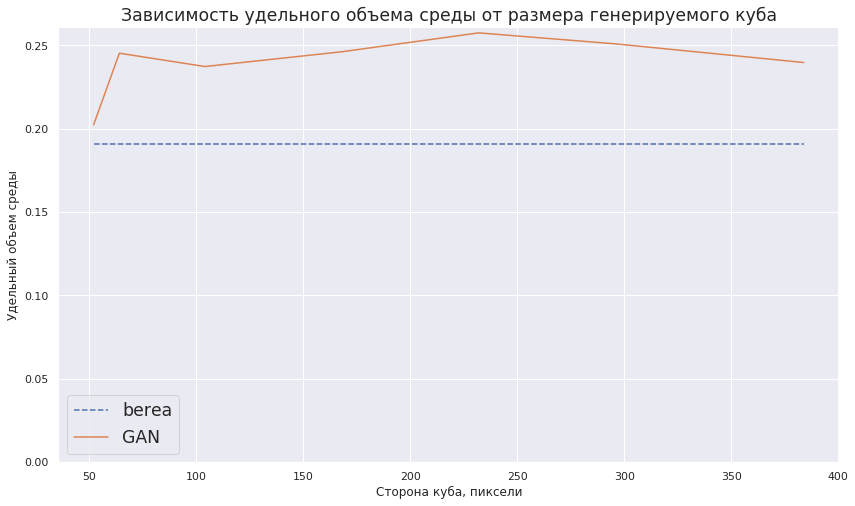

In [56]:
berea = df_stats.loc[0]['V']
df = df_stats[(df_stats['experiment'] == '2019-02-24_22_44') & (df_stats['seed'] == 14300631)].sort_values('size')
xs = df['size'].values

fig = plt.figure(figsize=(14, 8))
plt.plot(xs, [berea]*len(xs), label='berea', linestyle='dashed')
plt.plot(xs, df['V'], label='GAN')
plt.legend(fontsize='xx-large')
plt.title("Зависимость удельного объема среды от размера генерируемого куба", fontsize='xx-large')
plt.xlabel("Сторона куба, пиксели")
plt.ylabel("Удельный объем среды")
plt.ylim(0)
plt.show()

### Разброс V в зависимости от сида

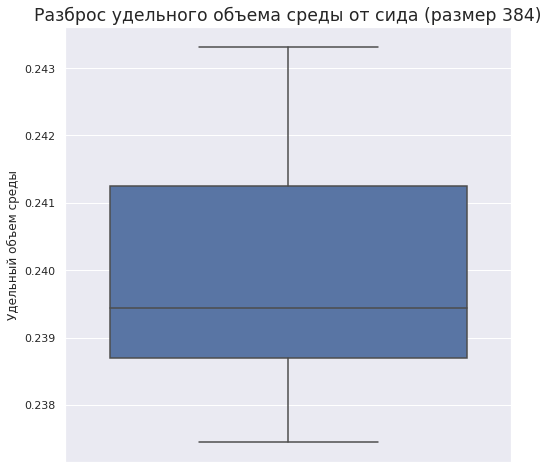

In [58]:
berea = df_stats.loc[0]['V']
df = df_stats[(df_stats['experiment'] == '2019-02-24_22_44') & (df_stats['seed'] != 14300631)].sort_values('size')

fig = plt.figure(figsize=(8, 8))
sns.boxplot(df['V'], orient='v')
plt.title("Разброс удельного объема среды от сида (размер 384)", fontsize='xx-large')
plt.ylabel('Удельный объем среды')
plt.show()

### Зависимость S от размера куба (fix seed = 14300631)

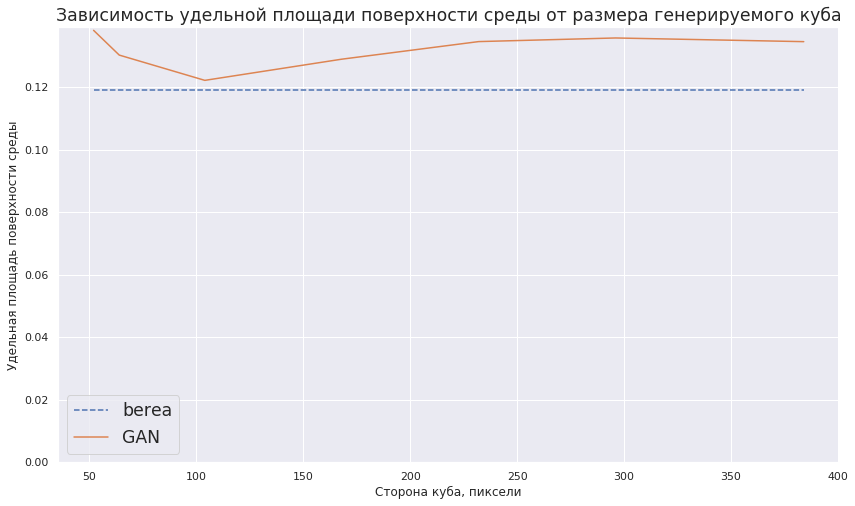

In [59]:
berea = df_stats.loc[0]['S']
df = df_stats[(df_stats['experiment'] == '2019-02-24_22_44') & (df_stats['seed'] == 14300631)].sort_values('size')
xs = df['size'].values

fig = plt.figure(figsize=(14, 8))
plt.plot(xs, [berea]*len(xs), label='berea', linestyle='dashed')
plt.plot(xs, df['S'], label='GAN')
plt.legend(fontsize='xx-large')
plt.title("Зависимость удельной площади поверхности среды от размера генерируемого куба", fontsize='xx-large')
plt.xlabel("Сторона куба, пиксели")
plt.ylabel("Удельная площадь поверхности среды")
plt.ylim(0)
plt.show()

### Разброс S в зависимости от сида

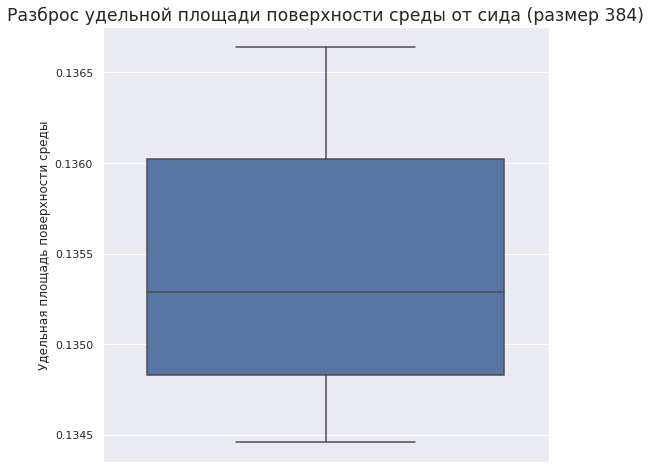

In [60]:
berea = df_stats.loc[0]['S']
df = df_stats[(df_stats['experiment'] == '2019-02-24_22_44') & (df_stats['seed'] != 14300631)].sort_values('size')

fig = plt.figure(figsize=(8, 8))
sns.boxplot(df['S'], orient='v')
plt.title("Разброс удельной площади поверхности среды от сида (размер 384)", fontsize='xx-large')
plt.ylabel('Удельная площадь поверхности среды')
plt.show()

### Зависимость B от размера куба (fix seed = 14300631)

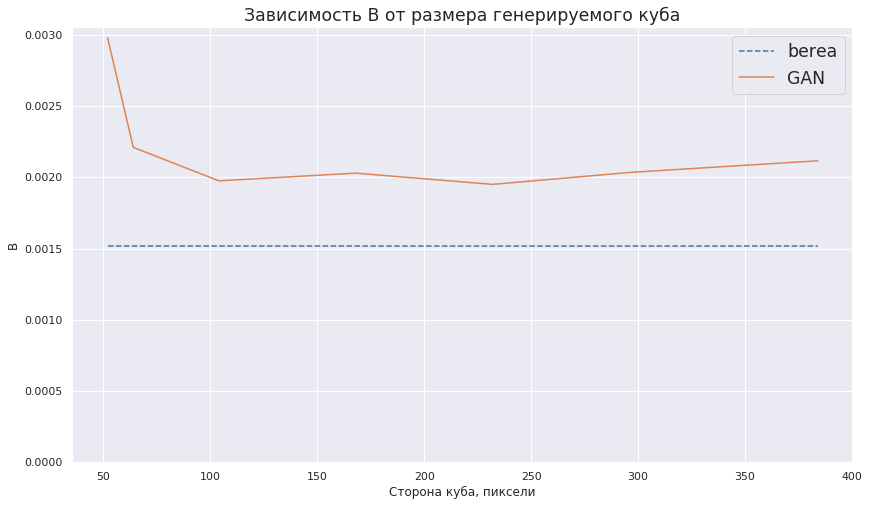

In [61]:
berea = df_stats.loc[0]['B']
df = df_stats[(df_stats['experiment'] == '2019-02-24_22_44') & (df_stats['seed'] == 14300631)].sort_values('size')
xs = df['size'].values

fig = plt.figure(figsize=(14, 8))
plt.plot(xs, [berea]*len(xs), label='berea', linestyle='dashed')
plt.plot(xs, df['B'], label='GAN')
plt.legend(fontsize='xx-large')
plt.title("Зависимость B от размера генерируемого куба", fontsize='xx-large')
plt.xlabel("Сторона куба, пиксели")
plt.ylabel("B")
plt.ylim(0)
plt.show()

### Разброс B в зависимости от сида

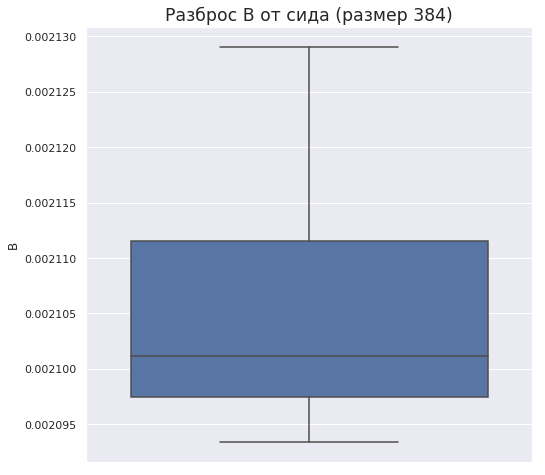

In [62]:
berea = df_stats.loc[0]['B']
df = df_stats[(df_stats['experiment'] == '2019-02-24_22_44') & (df_stats['seed'] != 14300631)].sort_values('size')

fig = plt.figure(figsize=(8, 8))
sns.boxplot(df['B'], orient='v')
plt.title("Разброс B от сида (размер 384)", fontsize='xx-large')
plt.ylabel('B')
plt.show()

### Зависимость Xi от размера куба (fix seed = 14300631)

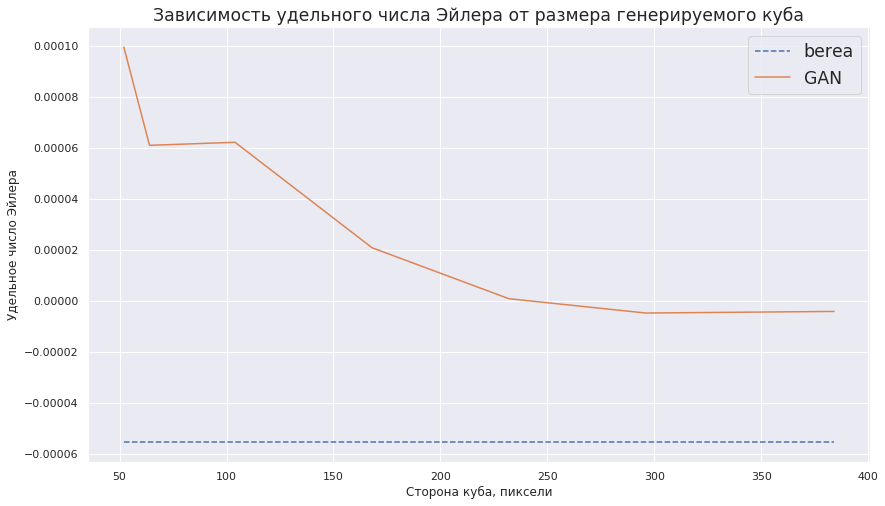

In [63]:
berea = df_stats.loc[0]['Xi']
df = df_stats[(df_stats['experiment'] == '2019-02-24_22_44') & (df_stats['seed'] == 14300631)].sort_values('size')
xs = df['size'].values

fig = plt.figure(figsize=(14, 8))
plt.plot(xs, [berea]*len(xs), label='berea', linestyle='dashed')
plt.plot(xs, df['Xi'], label='GAN')
plt.legend(fontsize='xx-large')
plt.title("Зависимость удельного числа Эйлера от размера генерируемого куба", fontsize='xx-large')
plt.xlabel("Сторона куба, пиксели")
plt.ylabel("Удельное число Эйлера")
plt.show()

### Разброс Xi в зависимости от сида

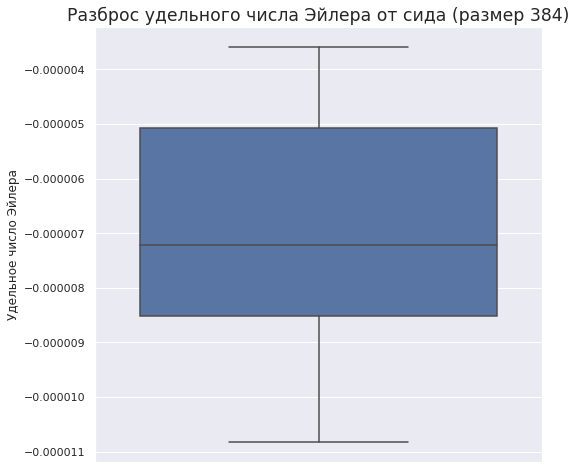

In [64]:
berea = df_stats.loc[0]['Xi']
df = df_stats[(df_stats['experiment'] == '2019-02-24_22_44') & (df_stats['seed'] != 14300631)].sort_values('size')

fig = plt.figure(figsize=(8, 8))
sns.boxplot(df['Xi'], orient='v')
plt.title("Разброс удельного числа Эйлера от сида (размер 384)", fontsize='xx-large')
plt.ylabel('Удельное число Эйлера')
plt.show()

## Experiment 2019-02-25 12:13

In [3]:
seed_stats = pd.read_csv('../experiments/2019-02-25_12_13/range_analyze.csv')

In [9]:
seed_stats

,V,S,B,Xi
0,0.218438,0.124139,0.001103,-0.000036
1,0.220197,0.124960,0.001104,-0.000038
2,0.219563,0.124680,0.001094,-0.000035
3,0.216799,0.123886,0.001123,-0.000034
4,0.219574,0.124947,0.001106,-0.000036
5,0.220893,0.124393,0.001088,-0.000034
6,0.216605,0.124147,0.001120,-0.000036
7,0.219110,0.123895,0.001091,-0.000034
8,0.217113,0.122841,0.001098,-0.000033
9,0.219280,0.124030,0.001110,-0.000032


### Зависимость V от размера куба (fix seed = 14300631)

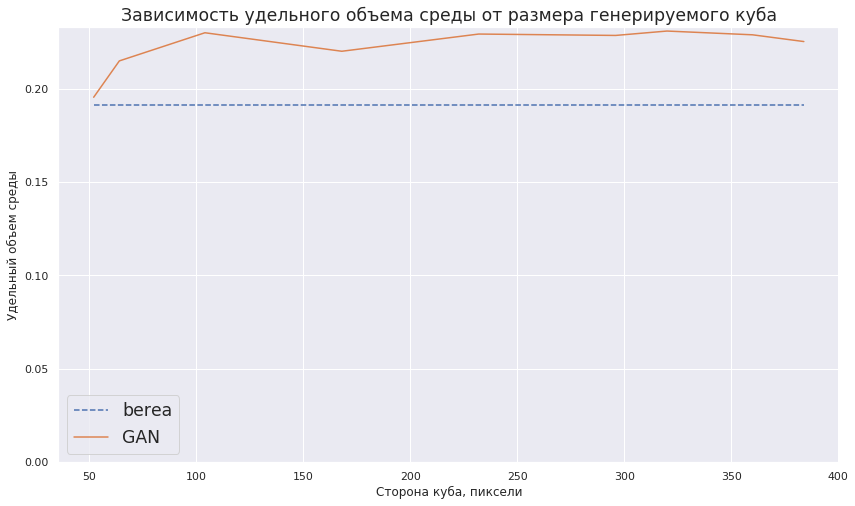

In [65]:
berea = df_stats.loc[0]['V']
df = df_stats[(df_stats['experiment'] == '2019-02-25_12_13') & (df_stats['seed'] == 14300631)].sort_values('size')
xs = df['size'].values

fig = plt.figure(figsize=(14, 8))
plt.plot(xs, [berea]*len(xs), label='berea', linestyle='dashed')
plt.plot(xs, df['V'], label='GAN')
plt.legend(fontsize='xx-large')
plt.title("Зависимость удельного объема среды от размера генерируемого куба", fontsize='xx-large')
plt.xlabel("Сторона куба, пиксели")
plt.ylabel("Удельный объем среды")
plt.ylim(0)
plt.show()

### Разброс V в зависимости от сида

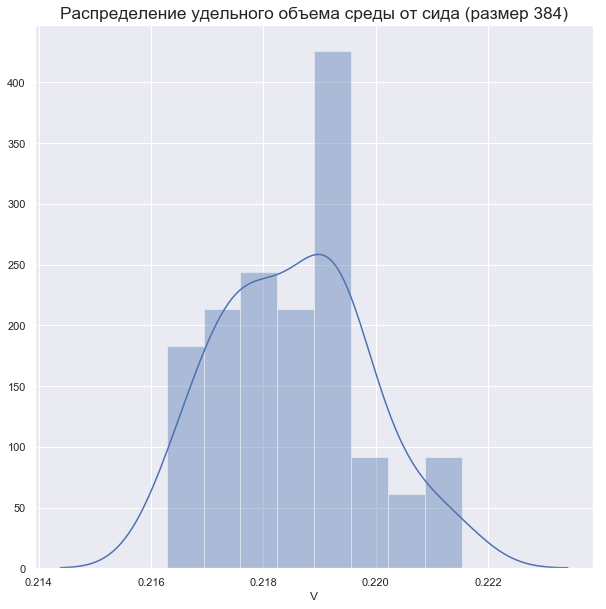

In [52]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(seed_stats['V'], bins=8)
plt.title("Распределение удельного объема среды от сида (размер 384)", fontsize='xx-large')
plt.show()

### Зависимость S от размера куба (fix seed = 14300631)

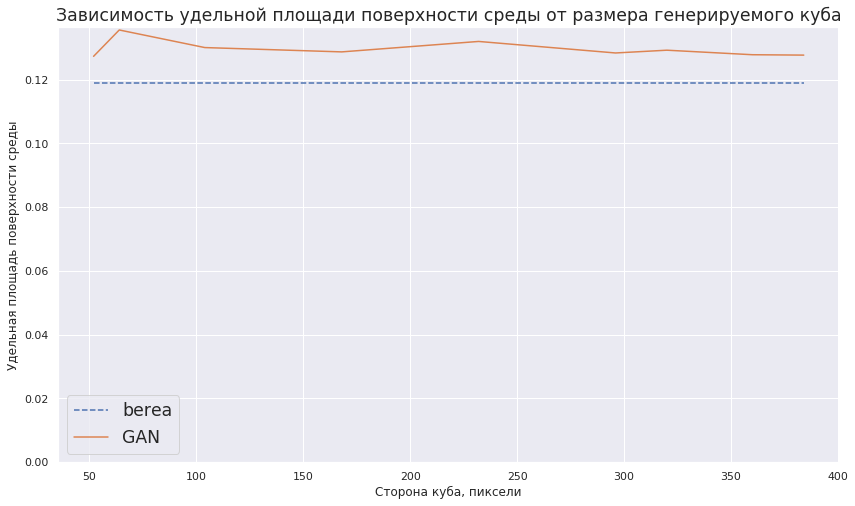

In [67]:
berea = df_stats.loc[0]['S']
df = df_stats[(df_stats['experiment'] == '2019-02-25_12_13') & (df_stats['seed'] == 14300631)].sort_values('size')
xs = df['size'].values

fig = plt.figure(figsize=(14, 8))
plt.plot(xs, [berea]*len(xs), label='berea', linestyle='dashed')
plt.plot(xs, df['S'], label='GAN')
plt.legend(fontsize='xx-large')
plt.title("Зависимость удельной площади поверхности среды от размера генерируемого куба", fontsize='xx-large')
plt.xlabel("Сторона куба, пиксели")
plt.ylabel("Удельная площадь поверхности среды")
plt.ylim(0)
plt.show()

### Разброс S в зависимости от сида

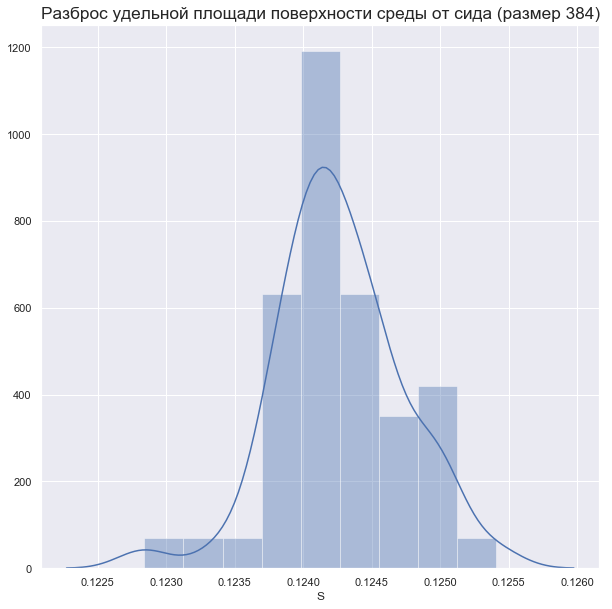

In [47]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(seed_stats['S'], bins=9)
plt.title("Разброс удельной площади поверхности среды от сида (размер 384)", fontsize='xx-large')
plt.show()

### Зависимость B от размера куба (fix seed = 14300631)

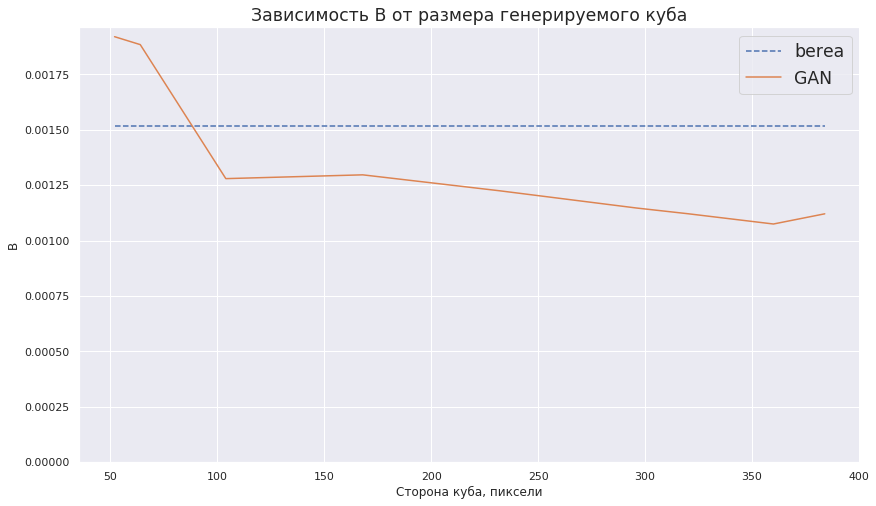

In [69]:
berea = df_stats.loc[0]['B']
df = df_stats[(df_stats['experiment'] == '2019-02-25_12_13') & (df_stats['seed'] == 14300631)].sort_values('size')
xs = df['size'].values

fig = plt.figure(figsize=(14, 8))
plt.plot(xs, [berea]*len(xs), label='berea', linestyle='dashed')
plt.plot(xs, df['B'], label='GAN')
plt.legend(fontsize='xx-large')
plt.title("Зависимость B от размера генерируемого куба", fontsize='xx-large')
plt.xlabel("Сторона куба, пиксели")
plt.ylabel("B")
plt.ylim(0)
plt.show()

### Разброс B в зависимости от сида

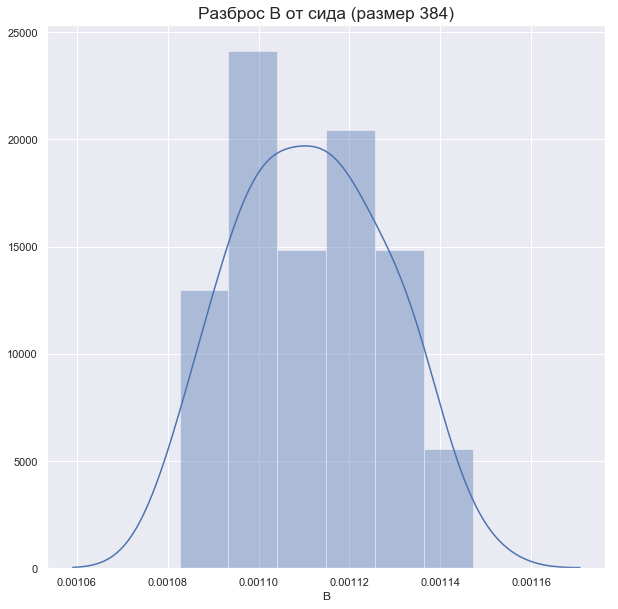

In [53]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(seed_stats['B'])
plt.title("Разброс B от сида (размер 384)", fontsize='xx-large')
plt.show()

### Зависимость Xi от размера куба (fix seed = 14300631)

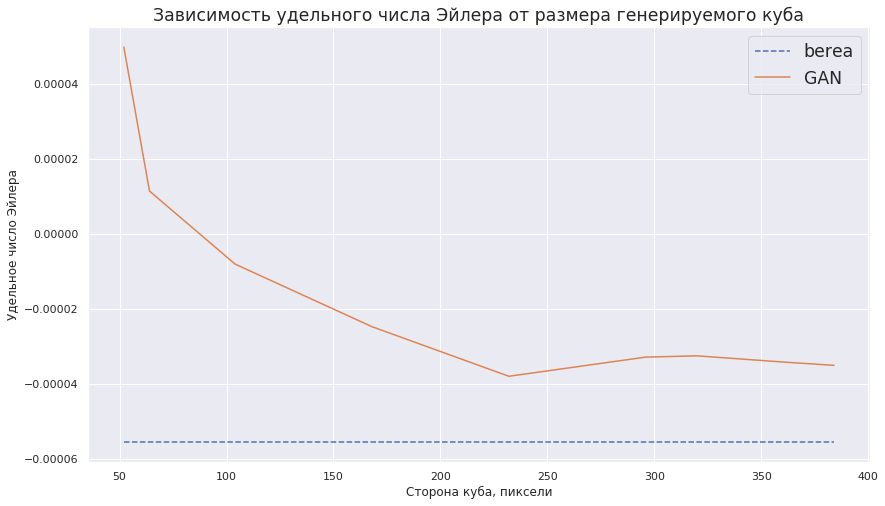

In [71]:
berea = df_stats.loc[0]['Xi']
df = df_stats[(df_stats['experiment'] == '2019-02-25_12_13') & (df_stats['seed'] == 14300631)].sort_values('size')
xs = df['size'].values

fig = plt.figure(figsize=(14, 8))
plt.plot(xs, [berea]*len(xs), label='berea', linestyle='dashed')
plt.plot(xs, df['Xi'], label='GAN')
plt.legend(fontsize='xx-large')
plt.title("Зависимость удельного числа Эйлера от размера генерируемого куба", fontsize='xx-large')
plt.xlabel("Сторона куба, пиксели")
plt.ylabel("Удельное число Эйлера")
plt.show()

### Разброс Xi в зависимости от сида

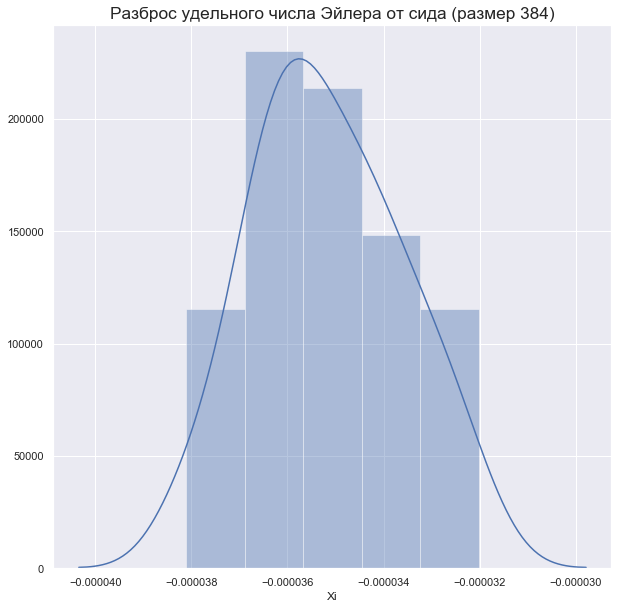

In [54]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(seed_stats['Xi'])
plt.title("Разброс удельного числа Эйлера от сида (размер 384)", fontsize='xx-large')
plt.show()

## Experiment 2019-03-21_16_30

In [55]:
seed_stats = pd.read_csv('../experiments/2019-03-21_16_30/range_analyze.csv')

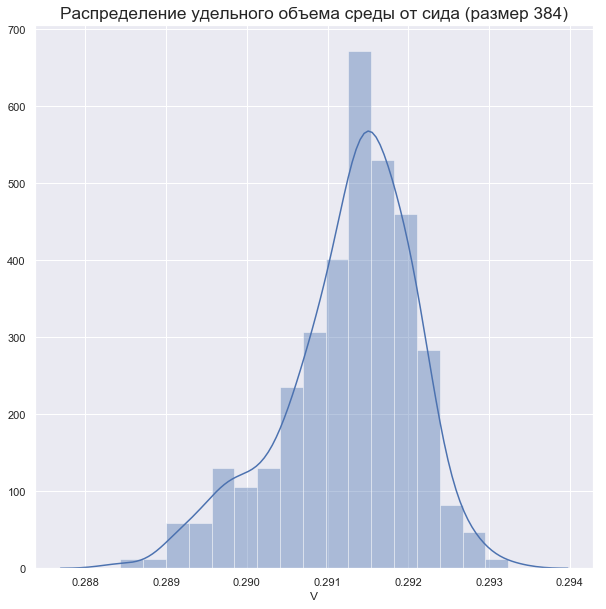

In [58]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(seed_stats['V'])
plt.title("Распределение удельного объема среды от сида (размер 384)", fontsize='xx-large')
plt.show()

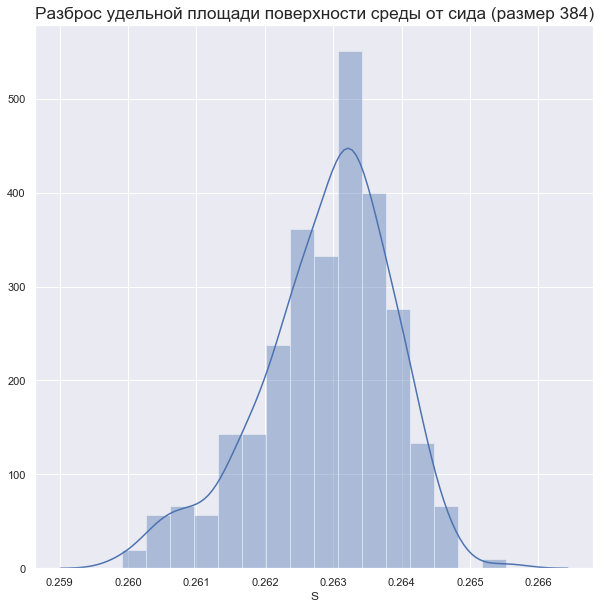

In [59]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(seed_stats['S'])
plt.title("Разброс удельной площади поверхности среды от сида (размер 384)", fontsize='xx-large')
plt.show()

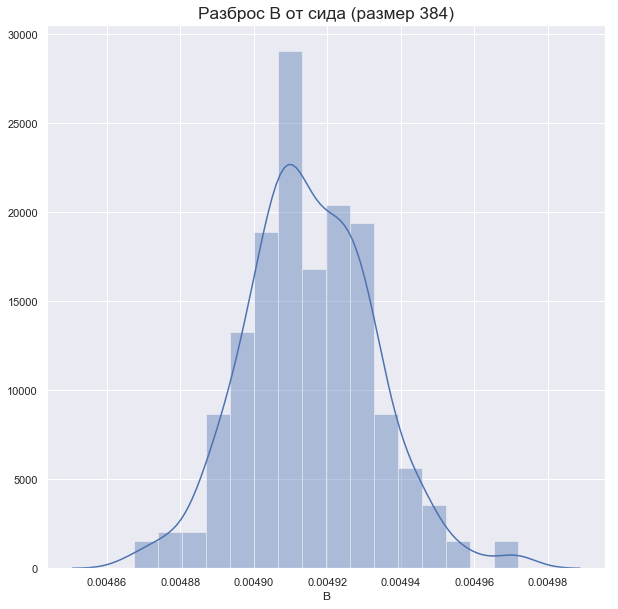

In [60]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(seed_stats['B'])
plt.title("Разброс B от сида (размер 384)", fontsize='xx-large')
plt.show()

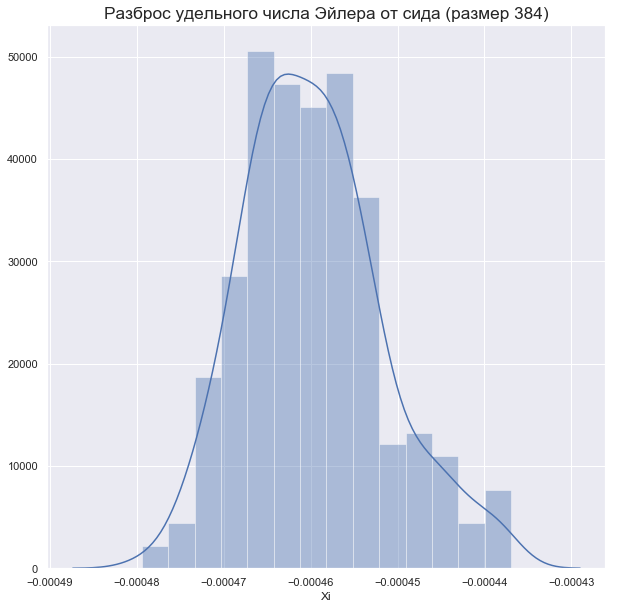

In [61]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(seed_stats['Xi'])
plt.title("Разброс удельного числа Эйлера от сида (размер 384)", fontsize='xx-large')
plt.show()

## Experiment 2019-03-27_14_43

In [62]:
seed_stats = pd.read_csv('../experiments/2019-03-27_14_43/range_analyze.csv')

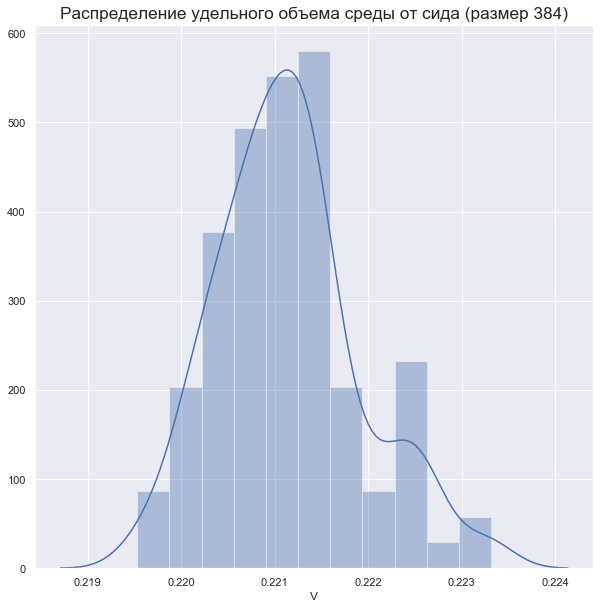

In [63]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(seed_stats['V'])
plt.title("Распределение удельного объема среды от сида (размер 384)", fontsize='xx-large')
plt.show()

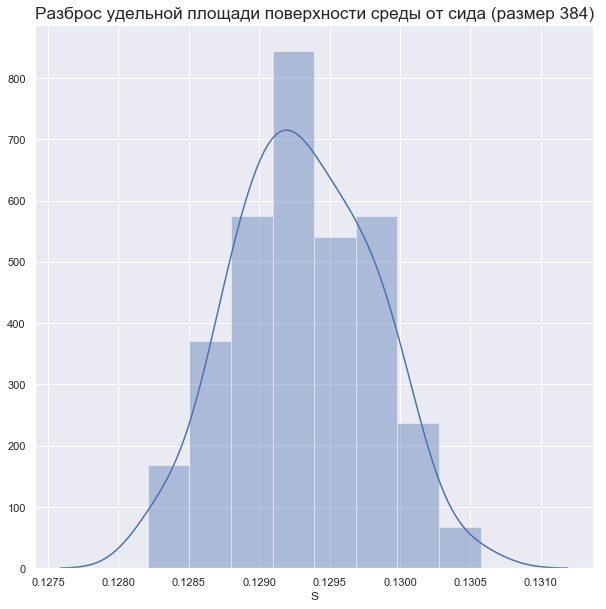

In [64]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(seed_stats['S'])
plt.title("Разброс удельной площади поверхности среды от сида (размер 384)", fontsize='xx-large')
plt.show()

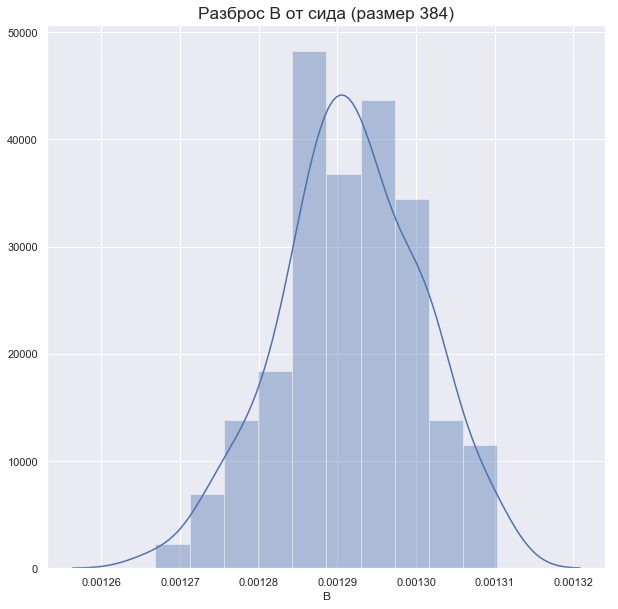

In [65]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(seed_stats['B'])
plt.title("Разброс B от сида (размер 384)", fontsize='xx-large')
plt.show()

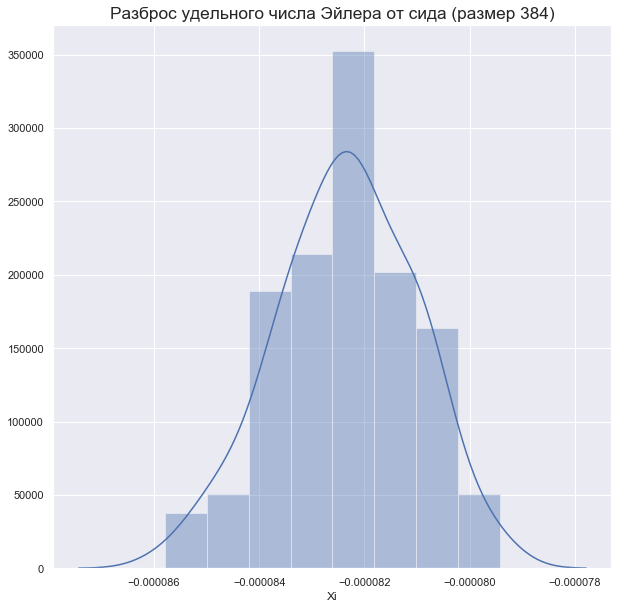

In [66]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(seed_stats['Xi'])
plt.title("Разброс удельного числа Эйлера от сида (размер 384)", fontsize='xx-large')
plt.show()